<a href="https://colab.research.google.com/github/stampini81/colab/blob/main/MLPRegressor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Bibliotecas essenciais para o projeto de MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns

# Montar o Google Drive para acessar seus arquivos
drive.mount('/content/drive')

print("Bibliotecas importadas e Google Drive montado com sucesso!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Bibliotecas importadas e Google Drive montado com sucesso!


In [9]:
# --- ESCOLHA SEU DATASET AQUI ---
nome_arquivo_csv = 'irisMLP.csv' # Usando 'irisMLP.csv' conforme sua solicitação.

# Caminho completo para o arquivo na raiz do Google Drive
caminho_arquivo = f'/content/drive/MyDrive/{nome_arquivo_csv}'

try:
    df = pd.read_csv(caminho_arquivo)
    print(f"Dataset '{nome_arquivo_csv}' carregado com sucesso!")
    print("\n--- Primeiras 5 linhas do DataFrame ---")
    print(df.head())
    print("\n--- Informações do DataFrame ---")
    df.info()
    print("\n--- Estatísticas Descritivas do DataFrame ---")
    print(df.describe())

except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_arquivo_csv}' NÃO FOI ENCONTRADO na raiz do seu Google Drive.")
    print("Por favor, verifique o nome do arquivo (incluindo maiúsculas/minúsculas) e se ele está diretamente na pasta 'Meu Drive'.")
    print("\nTentando listar os arquivos na sua pasta 'Meu Drive' para ajudar na depuração:")
    # Usando o comando shell para listar arquivos no Drive
    !ls /content/drive/MyDrive/
    df = None # Define df como None para evitar NameError mais tarde
except Exception as e:
    print(f"Ocorreu um erro inesperado ao carregar o arquivo: {e}")
    df = None # Define df como None para evitar NameError mais tarde

Dataset 'irisMLP.csv' carregado com sucesso!

--- Primeiras 5 linhas do DataFrame ---
   sepal.length  sepal.width  petal.length  petal.width      variety
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

--- Esta

In [12]:
if df is not None:
    # --- DEFINIÇÃO DE FEATURES (X) E TARGET (y) PARA irisMLP.csv ---

    print("\n--- Verificando Colunas Disponíveis no DataFrame ---")
    print("Colunas disponíveis:", df.columns.tolist())

    # Nomes de colunas do seu Iris dataset (com pontos)
    # AJUSTE FEITO AQUI: Substituindo '_' por '.'
    expected_features = ['sepal.length', 'sepal.width', 'petal.length']
    expected_target = 'petal.width'

    # Verificar se as colunas esperadas estão presentes no DataFrame
    missing_features = [col for col in expected_features if col not in df.columns]
    missing_target = expected_target not in df.columns

    if missing_features or missing_target:
        print("\nAVISO: Algumas colunas esperadas para o Iris dataset NÃO foram encontradas.")
        if missing_features:
            print(f"Features faltando: {missing_features}")
        if missing_target:
            print(f"Target faltando: {expected_target}")
        print("\nPor favor, examine as 'Colunas disponíveis' acima e ajuste a definição de X e y.")
        # O exemplo de ajuste abaixo já está correto agora, mas deixamos para referência.
        print("Exemplo de ajuste se os nomes forem diferentes (ex: 'sepal_len' em vez de 'sepal.length'):")
        print("X = df[['sepal_len', 'sepal_wid', 'petal_len']]")
        print("y = df['petal_wid']")
        X = None
        y = None
    else:
        # As colunas estão corretas, pode definir X e y
        # AJUSTE FEITO AQUI: Usando os nomes de coluna com ponto
        X = df[expected_features]
        y = df[expected_target]

        print(f"\nVariáveis de entrada (X) para {nome_arquivo_csv}: {X.columns.tolist()}")
        print(f"Variável de saída (y) para {nome_arquivo_csv}: {y.name}")
        print(f"Formato de X (features): {X.shape}")
        print(f"Formato de y (target): {y.shape}")
else:
    print("\nNão foi possível definir X e y porque o DataFrame 'df' não foi carregado com sucesso no Passo 2.")
    print("Por favor, resolva o erro no Passo 2 primeiro.")


--- Verificando Colunas Disponíveis no DataFrame ---
Colunas disponíveis: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

Variáveis de entrada (X) para irisMLP.csv: ['sepal.length', 'sepal.width', 'petal.length']
Variável de saída (y) para irisMLP.csv: petal.width
Formato de X (features): (150, 3)
Formato de y (target): (150,)


In [13]:
# Divisão dos dados em conjunto de treino e conjunto de teste
# test_size=0.2 significa que 20% dos dados serão usados para teste, e 80% para treino.
# random_state=42 garante que a divisão seja a mesma toda vez que você rodar o código, para reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n--- Divisão dos Dados ---")
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Tamanho do target de treino (y_train): {y_train.shape}")
print(f"Tamanho do target de teste (y_test): {y_test.shape}")


--- Divisão dos Dados ---
Tamanho do conjunto de treino (X_train): (120, 3)
Tamanho do conjunto de teste (X_test): (30, 3)
Tamanho do target de treino (y_train): (120,)
Tamanho do target de teste (y_test): (30,)


In [14]:
# Criação do Pipeline:
# 1. 'scaler': Etapa de normalização dos dados. Escolha um dos dois:
scaler_selected = StandardScaler() # Boa opção geral e robusta para MLP
# scaler_selected = MinMaxScaler() # Se você prefere que os dados fiquem entre 0 e 1

# 2. 'mlp': O modelo de Rede Neural Perceptron Multicamadas para Regressão.
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50), # Exemplo: duas camadas ocultas, 100 neurônios na primeira, 50 na segunda
    max_iter=1000,                # Aumente se precisar de mais iterações para convergir
    activation='relu',            # Função de ativação
    solver='adam',                # Otimizador
    random_state=42,              # Para resultados reprodutíveis
    verbose=True                  # Para ver o progresso do treinamento
)

# Definindo o pipeline com as duas etapas: normalização e o modelo MLP
model_pipeline = Pipeline([
    ('scaler', scaler_selected), # Primeiro, normaliza os dados
    ('mlp', mlp)                 # Depois, treina o MLP com os dados normalizados
])

print("\nPipeline de pré-processamento e modelo criado:")
print(model_pipeline)


Pipeline de pré-processamento e modelo criado:
Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000,
                              random_state=42, verbose=True))])


In [15]:
# Treinando o modelo usando o pipeline
# O pipeline aplicará o scaler e então treinará o MLP nos dados transformados
print("\nIniciando o treinamento do modelo (isso pode levar alguns segundos/minutos)...")
model_pipeline.fit(X_train, y_train)
print("Treinamento do modelo concluído.")


Iniciando o treinamento do modelo (isso pode levar alguns segundos/minutos)...
Iteration 1, loss = 1.17229689
Iteration 2, loss = 1.10949479
Iteration 3, loss = 1.05087571
Iteration 4, loss = 0.99501472
Iteration 5, loss = 0.94115258
Iteration 6, loss = 0.88883912
Iteration 7, loss = 0.83827661
Iteration 8, loss = 0.78935840
Iteration 9, loss = 0.74198867
Iteration 10, loss = 0.69644038
Iteration 11, loss = 0.65256151
Iteration 12, loss = 0.61047370
Iteration 13, loss = 0.57019106
Iteration 14, loss = 0.53158058
Iteration 15, loss = 0.49476176
Iteration 16, loss = 0.45976801
Iteration 17, loss = 0.42647006
Iteration 18, loss = 0.39476396
Iteration 19, loss = 0.36455254
Iteration 20, loss = 0.33596985
Iteration 21, loss = 0.30888109
Iteration 22, loss = 0.28340025
Iteration 23, loss = 0.25952735
Iteration 24, loss = 0.23720149
Iteration 25, loss = 0.21654435
Iteration 26, loss = 0.19750887
Iteration 27, loss = 0.18006570
Iteration 28, loss = 0.16408103
Iteration 29, loss = 0.14958572
I


--- Métricas de Avaliação no Conjunto de Teste ---
Erro Médio Absoluto (MAE): 0.1560
Erro Quadrático Médio (MSE): 0.0470
Raiz do Erro Quadrático Médio (RMSE): 0.2168
R² Score (Coeficiente de Determinação): 0.9261


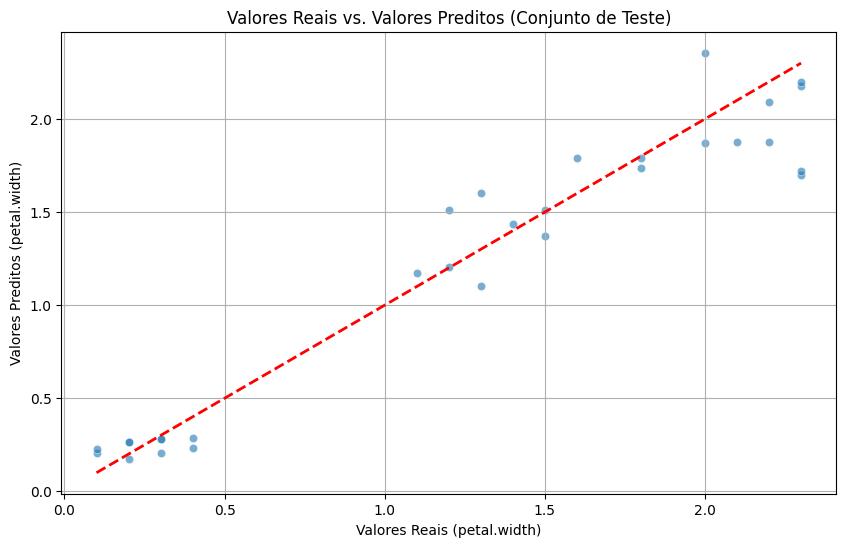

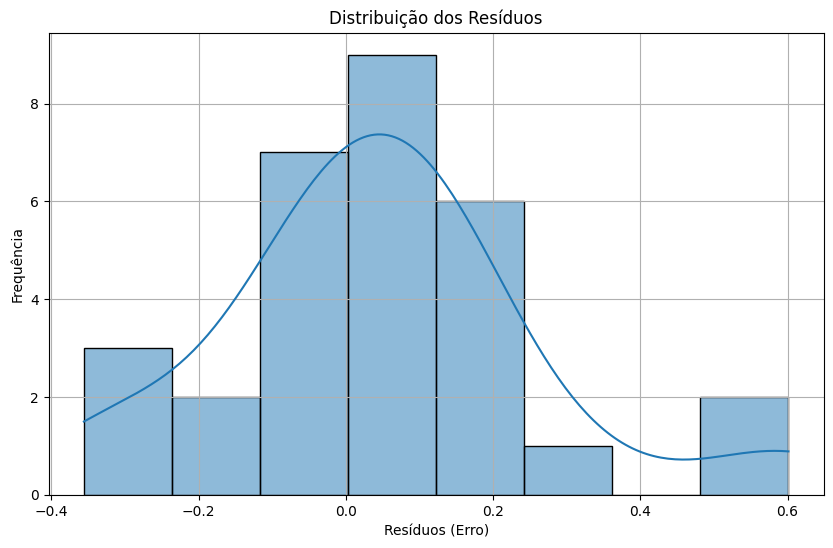

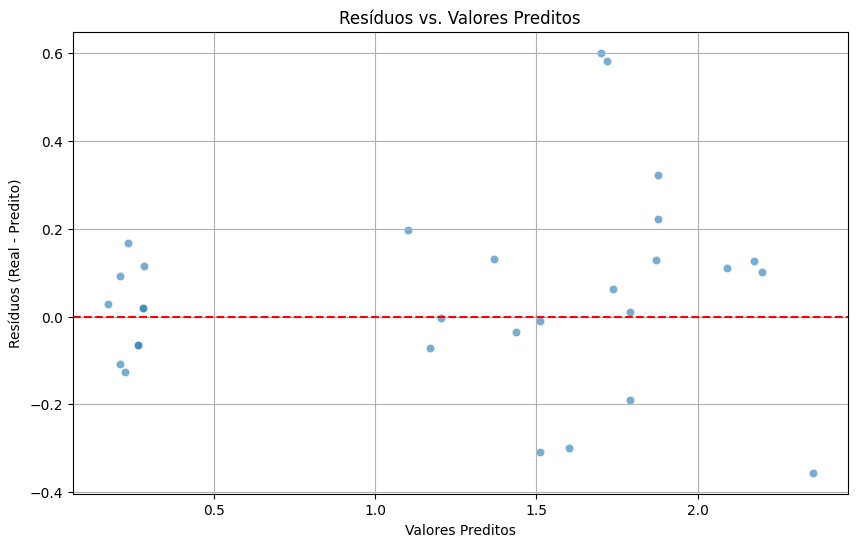

In [16]:
# Fazendo previsões nos dados de teste (o pipeline normaliza X_test automaticamente antes da previsão)
y_pred = model_pipeline.predict(X_test)

# Calculando métricas de avaliação para regressão
mae = metrics.mean_absolute_error(y_test, y_pred) # Erro Médio Absoluto
mse = metrics.mean_squared_error(y_test, y_pred)   # Erro Quadrático Médio
rmse = np.sqrt(mse)                                # Raiz do Erro Quadrático Médio
r2 = metrics.r2_score(y_test, y_pred)              # Coeficiente de Determinação (R-quadrado)

print("\n--- Métricas de Avaliação no Conjunto de Teste ---")
print(f"Erro Médio Absoluto (MAE): {mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"R² Score (Coeficiente de Determinação): {r2:.4f}")

# --- Visualização das Previsões vs. Valores Reais ---
plt.figure(figsize=(10, 6))
# Gráfico de dispersão dos valores reais (y_test) vs. valores preditos (y_pred)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Adiciona uma linha vermelha de 45 graus (y=x). Previsões perfeitas cairiam nessa linha.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel(f"Valores Reais ({y.name})")
plt.ylabel(f"Valores Preditos ({y.name})")
plt.title("Valores Reais vs. Valores Preditos (Conjunto de Teste)")
plt.grid(True)
plt.show()

# --- Visualização dos Resíduos (Erros) ---
# Resíduos = Diferença entre o valor real e o valor predito
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True) # Histograma da distribuição dos resíduos
plt.xlabel("Resíduos (Erro)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6) # Dispersão dos resíduos vs. previsões
plt.axhline(y=0, color='r', linestyle='--') # Linha em y=0
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos (Real - Predito)")
plt.title("Resíduos vs. Valores Preditos")
plt.grid(True)
plt.show()

In [17]:
# Teste individual de novas amostras (valores originais, NÃO normalizados manualmente)
print("\n--- Testando Previsões para Novas Amostras Individuais ---")

# Exemplo de uma nova amostra para o dataset Iris
# Features usadas: 'sepal_length', 'sepal_width', 'petal_length'
# Crie um cenário de uma nova flor que você queira prever a largura da pétala.
sepal_length_nova = 5.2 # Exemplo
sepal_width_nova = 3.0  # Exemplo
petal_length_nova = 1.5 # Exemplo

# Crie um array 2D com as novas amostras, na mesma ordem das features usadas no treinamento (X)
nova_flor_exemplo = np.array([[sepal_length_nova, sepal_width_nova, petal_length_nova]])

# Faça a previsão usando o pipeline
# O pipeline irá automaticamente aplicar a normalização e então passar para o MLP
prediction_nova_flor = model_pipeline.predict(nova_flor_exemplo)

print(f"Características da nova flor: sepal_length={sepal_length_nova}, sepal_width={sepal_width_nova}, petal_length={petal_length_nova}")
print(f"Previsão do petal_width (largura da pétala): {prediction_nova_flor[0]:.4f}")

# Se você quiser inspecionar os valores normalizados que o pipeline usou (apenas para ver):
scaled_input = model_pipeline.named_steps['scaler'].transform(nova_flor_exemplo)
print(f"Valores de entrada normalizados para a flor: {scaled_input[0]}")


--- Testando Previsões para Novas Amostras Individuais ---
Características da nova flor: sepal_length=5.2, sepal_width=3.0, petal_length=1.5
Previsão do petal_width (largura da pétala): 0.2639
Valores de entrada normalizados para a flor: [-0.74255534 -0.13788033 -1.27600637]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
